In [1]:
import numpy as np
from numpy import genfromtxt
#from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
import csv
from jurrefuncs import *

#Retrieve the data from several trainingdata files and testdata files and put them in
#features, testfeatures and labels

dataFile = []
rangenr = 10 #there are 9 data files, this nr is simply to go over all of them
for i in range(1, rangenr):
    dataFile.append(genfromtxt(r"feature extraction\dataset\clustering\sum up of the feature\sumupCluster_"+ str(i) +"_train_org.csv", delimiter=','))
#dataMatrix = genfromtxt("feature extraction\dataset\clustering\sum up of the feature\sumupCluster_4_train_org.csv", delimiter=',')
featurelength = len(dataFile[0]) -1

tempMatrix = np.array([dataFile[i][0:-1] for i in range(0, rangenr-1) ])
features = tempMatrix.reshape(-1, tempMatrix.shape[-1])
labels = list(dataFile[0][6])

#Also import the testdata

testdataFile = []
for i in range(1, rangenr):
    testdataFile.append(genfromtxt(r"feature extraction\dataset\clustering\sum up of the feature\sumupCluster_"+ str(i) +"_test_org.csv", delimiter=','))


testtempMatrix = np.array([testdataFile[i] for i in range(0, rangenr-1) ]) #does nothing
testfeatures = list(testtempMatrix.reshape(-1, testtempMatrix.shape[-1]))      

In [2]:
#Here, we try to create some nonlinear data. 
#Let's start by taking the Log of all data
#It may actually be easier to copy the x data and take the exponent of the labels. Seems easy enough anyway
logfeatures = np.log(features)
logtestfeatures = np.log(features)

extrafeatures = logfeatures
extratestfeatures = logtestfeatures


In [49]:
#Recursive feature selection with cross validation, takes a very long time to evaluate
#When you are testing the data, use featurelength = low number
# in the final answer, use all features: featurerange = len(features)
featurerange = len(features)
fitdatarange = len(features[0])
Xstand = [[features[i][j]  for i in range(0, featurerange )] for j in range(0, fitdatarange)   ] 
Xextra = [[extrafeatures[i][j]  for i in range(0, featurerange )] for j in range(0, fitdatarange)   ] 
X = np.concatenate((Xstand, Xextra),1)
y = labels 
#when we use verbose, I think we get featurerange*(cv+1)/step outsputs of LibSVM
estimator = SVR(kernel="linear", verbose = True)  #Perhaps we should try a gaussian kernel 

    
#step is the amount of features to remove in one step, cv has to do with the nr of cross validations
selector = RFECV(estimator, step=1, cv=3) #lower cv if evaluation takes to long
selector = selector.fit(X, y)
selectedBool = selector.support_ 

#Here the model (selector) is used to make prediction for the testdata. 
#The predictions are then written to a file
testDatastand = [[testfeatures[i][j] for i in range(0, featurerange)] for j in range(0, len(testfeatures[0]))   ]
testDataextra = [[extratestfeatures[i][j] for i in range(0, featurerange)] for j in range(0, len(testfeatures[0]))   ]
testData = np.concatenate((testDatastand, testDataextra),1)
ans = selector.predict(testData)

c = csv.writer(open("submissionjurretemp.csv", "wb"))
c.writerow(['ID' , 'Prediction'])
for i in range(0, len(ans)):
    c.writerow([i+1 , ans[i]]) 
    
 
    
testlist = selector.predict(X) - labels
testlist2 = testlist**2
thesum = 0
for i in testlist2:
    thesum += i
    
print(thesum)
#print('finish')

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [29]:
selectedBool = selector.support_ 
selectedBool   

array([ True, False,  True, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False,  True, False,
        True, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True], dtype=bool)

In [ ]:
x_names = ['mean', 'variance' , 'standard variance', 'median', 'skewness', 'kurtosis']
y_name = 'Brain age'
scatterPlotGrid(features[26:32], labels, 3, 3, x_names, y_name);

In [ ]:
Xstand = [[features[i][j]  for i in range(0, featurerange )] for j in range(0, fitdatarange)   ] 
Xextra = [[extrafeatures[i][j]  for i in range(0, featurerange )] for j in range(0, fitdatarange)   ] 
X = np.concatenate((Xstand, Xextra),1)

In [ ]:
len(X[1])

In [8]:
testData[1] 


5.4510384535657002

In [26]:
testData[1]

array([  2.33580000e+02,   1.94130000e+05,   4.40600000e+02,
         2.22040000e-18,   1.65580000e+00,   4.25610000e+00,
         5.36530000e+02,   4.39490000e+04,   1.87200000e+02,
         5.16000000e+02,   1.99150000e+00,   9.87890000e+00,
         6.66160000e+02,   1.94970000e+04,   1.27700000e+02,
         6.79330000e+02,   1.71970000e+00,   1.23350000e+01,
         6.73230000e+02,   1.10410000e+04,   5.45950040e+00,
         1.21266506e+01,   6.06334325e+00,  -4.06488443e+01,
         4.43467130e-01,   1.37964732e+00,   6.18484968e+00,
         1.06550923e+01,   5.15784767e+00,   6.10702289e+00,
         1.14844952e+00,   2.99947526e+00,   6.48760791e+00,
         9.60021796e+00,   4.68877577e+00,   6.50328468e+00,
         1.08105913e+00,   3.43608178e+00,   6.53790825e+00,
         9.14259672e+00])

In [19]:
X[1]

array([ 234.98     ,    5.4595004])

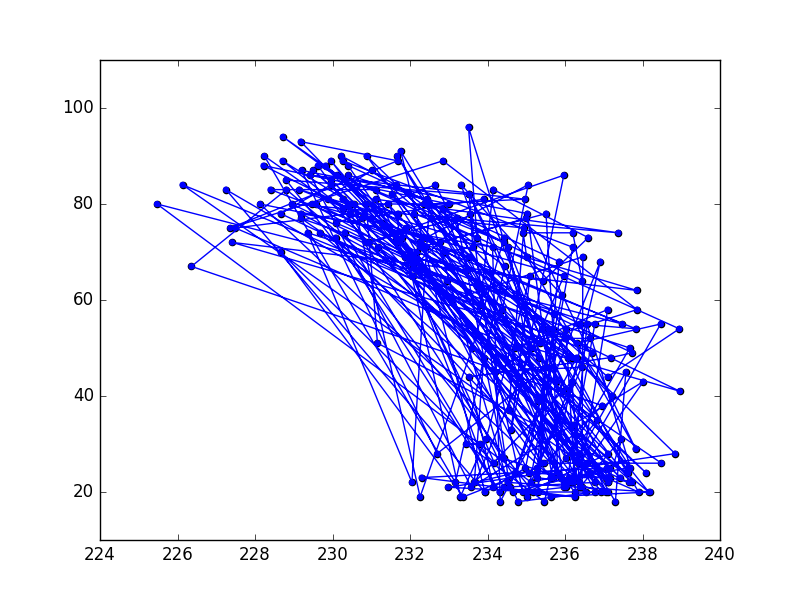

In [46]:
import matplotlib.pyplot as plt
from IPython.display import *
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib



def displayPlot(plt):
    plt.savefig("temp_plot.png")
    display(Image(filename='temp_plot.png'))

    
#fig1 = plt.figure()
#fig1.scatter(x[1],y,color='blue',s=5,edgecolor='none')
plt.scatter(features[0], y, s = 5, edgecolor = 'none' )
#plt.plot(X,S)

displayPlot(fig1)

In [36]:
len(X[0])
len(y)

278

In [39]:
len(features[1])

278